In [1]:
%load_ext autoreload
%autoreload 2

# Testing wavelet-based meshing in tinerator

I. Özgen-Xian (LBNL) and S. Molins (LBNL)

## tinerator

tinerator is an unstructured mesh generator for integrated hydrology simulations, built on the LaGriT engine. We implemented a wavelet analysis-based strategy to generate multiresolution triangular meshes. The mesh generation methodology is described in detail in (Özgen-Xian *et al.*, 2020).

This notebook shows how to use the wavelet-based mesh generation.

In [2]:
import tinerator as tin

## Wavelet analysis

The methodology is implemented in the method `build_wavelet_triplane(input_data, threshold, n_levels, min_edge_length, file_name)` of the `DEM` class. The method takes an array used as input for the wavelet analysis, in our case the topography, a threshold steering the refinement, the total number of refinement levels, the smallest cell size, and the name of the output file.

Firstly, we import the topography of Copper Creek, East River Watershed, Colorado.

[18:05:01 -            from_file()] INFO - Reading DEM: /Users/IOzgen/Documents/work/coding/python/LaGriT/examples/data/dem.asc
[18:05:01 -             plot_dem()] INFO - Plotting DEM


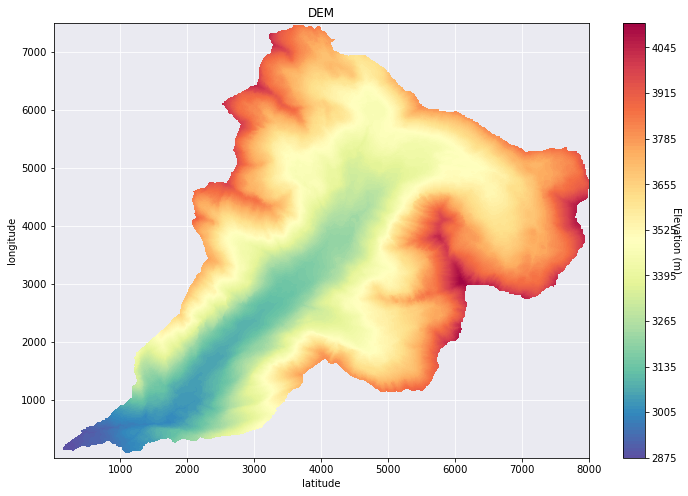

In [3]:
cc = tin.load.from_file("/Users/IOzgen/Documents/work/coding/python/LaGriT/examples/data/dem.asc")
cc.plot_dem()

We now use the imported DEM as input data for the wavelet analysis.

[18:05:06 -  squareTraceBoundary()] INFO - A Square Tracing method of finding boundary in a psuedo-masked array
[18:05:06 -  squareTraceBoundary()] INFO - C T. Pavlidis, Algorithms for Graphics and Image Processing, Computer Science Press, Rockville, Maryland, 1982
[18:05:06 -  squareTraceBoundary()] INFO - p Finding starting pixel...
[18:05:08 -  squareTraceBoundary()] INFO - p Iterating over array...
[18:05:08 -  squareTraceBoundary()] INFO - p Found origin...
[18:05:08 -  squareTraceBoundary()] INFO - p Generating array...
[18:05:09 - _wavelet_surface_mesh()] INFO - [ WAVELET-BASED TRIPLANE GENERATION ]
[18:05:09 - _wavelet_surface_mesh()] INFO - I. Ozgen-Xian, G. Kesserwani, D. Caviedes-Voullieme, S. Molins,    Z. Xu, D. Dwivedi, J.D. Moulton, C.I. Steefel, 2020. Wavelet-based    local mesh refinement for rainfall-runoff simulations, Journal of    Hydroinformatics, 22, 1059-1077.
[18:05:09 -                  dht()] INFO - Haar wavelet transform of a 1024-by-1024 matrix.
[18:05:09 -

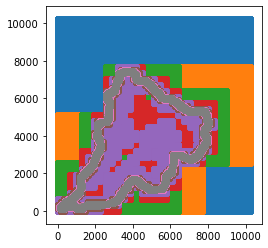

[18:05:16 - _wavelet_surface_mesh()] INFO - Preparing feature and boundary
[18:05:17 - _wavelet_surface_mesh()] INFO - First pass triangulation
[18:05:17 - _wavelet_surface_mesh()] INFO - Refining at length 64
[18:05:20 - _wavelet_surface_mesh()] INFO - Refining at length 32
[18:05:21 - _wavelet_surface_mesh()] INFO - Refining at length 16
[18:05:23 - _wavelet_surface_mesh()] INFO - Refining at length 8
[18:05:25 - _wavelet_surface_mesh()] INFO - Refining areas at refinement level 1
[18:05:26 - _wavelet_surface_mesh()] INFO - Smoothing mesh (1/2)
[18:05:28 - _wavelet_surface_mesh()] INFO - Smoothing mesh (2/2)
[18:05:29 - _wavelet_surface_mesh()] INFO - Refining areas at refinement level 2
[18:05:29 - _wavelet_surface_mesh()] INFO - Smoothing mesh (1/2)
[18:05:31 - _wavelet_surface_mesh()] INFO - Smoothing mesh (2/2)
[18:05:31 - _wavelet_surface_mesh()] INFO - Refining areas at refinement level 3
[18:05:32 - _wavelet_surface_mesh()] INFO - Smoothing mesh (1/2)
[18:05:34 - _wavelet_surf

mo1

In [4]:
cc.build_wavelet_triplane(cc.dem, 1.0e-1, 8, 10.0, "cc.inp")

In [15]:
outfile = 'surface_mesh.exo'
tin.dump.to_exodus(cc, outfile, mesh = 'surface')

[18:19:16 -            to_exodus()] INFO - Wrote Exodus mesh to: "surface_mesh.exo"


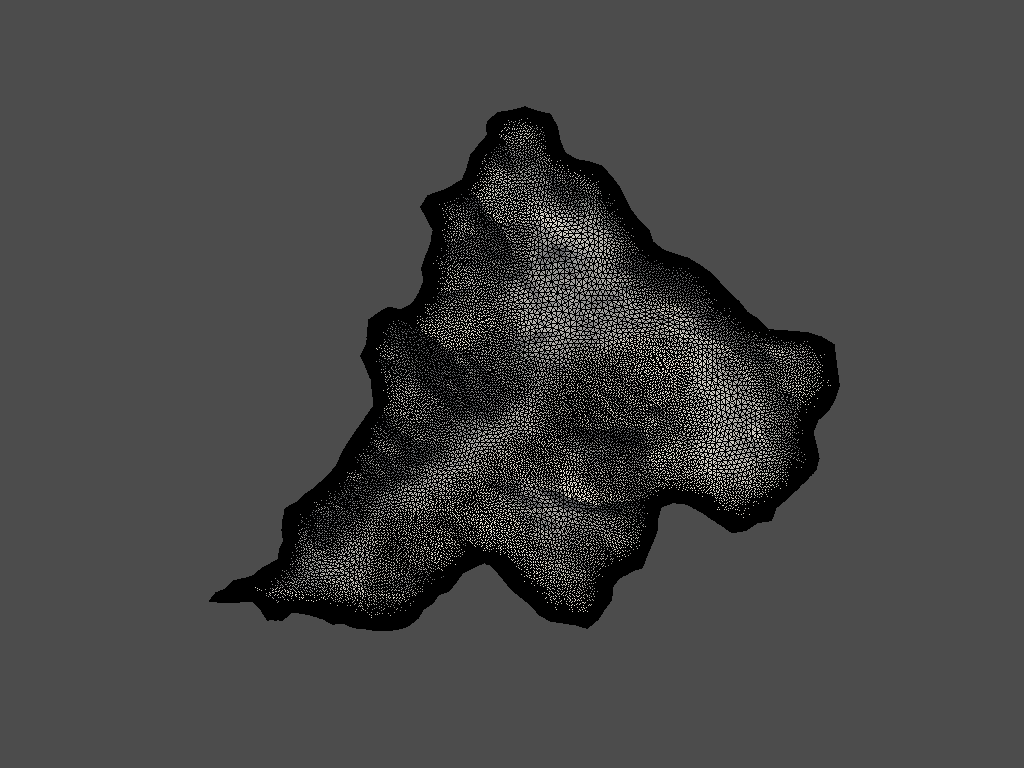

[(6500.0, 6500.0, 21500.0),
 (4000.0, 4000.0, 3500.0),
 (0.0, 0.7071067811865475, 0.7071067811865475)]


In [71]:
import pyvista

view = [(6500.0, 6500.0, 21500.0), (4000.0, 4000.0, 3500.0),
 (0.0, 1.0, 1.0)]

p = pyvista.Plotter()
p.add_mesh(pyvista.read(outfile), show_edges = True, color = 'w')
p.show(cpos = view)
print(p.camera_position)

## References

I. Özgen-Xian, G. Kesserwani, D. Caviedes-Voullième, S. Molins, Z. Xu, D. Dwivedi, J. D. Moulton & C. I. Steefel (2020). Wavelet-based local mesh refinement for rainfall-runoff simulations, *Journal of Hydroinformatics*, 22, 1059-1077. doi: 10.2166/hydro.2020.198